In [1]:
import numpy as np
import os
import statistics as st
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from tqdm import tqdm
out_path=r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\Dataset\Feb 2_per_frame'
if not os.path.exists(out_path):
    os.makedirs(out_path)


In [2]:
a=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\GT data\Feb 2_per_frame\ video_gtpf_1.npy')
print(a.shape)
print(a[0:5,:])
b=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\GT data\Feb 2_per_frame\ video_gtpf_2.npy')
print(b.shape)
print(b[0:5,:])

(4492, 2)
[[1. 4.]
 [2. 4.]
 [3. 4.]
 [4. 4.]
 [5. 4.]]
(4491, 2)
[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]]


In [3]:
#load all video GT
#all_gt=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\GT data\Feb 2_per_frame\all_gt.npy')
#print(all_gt.shape)
#b=np.where(all_gt[:,1]==6)[0]
#print(all_gt[-4491,0])

all_gt=np.array([]).reshape(0,2)

frame_max=0

for i in range(1,14):
    gt=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\GT data\Feb 2_per_frame\ video_gtpf_'+str(i)+'.npy')
    print(gt[-1,0])
    frame_max=max(frame_max,gt[-1,0])
    if i>1:
        gt[:,0]=gt[:,0]+frame_max
    frame_max=gt[-1,0]
    print("   Frame Max frame for video= ",str(i)," = ",frame_max)
    print("Max frame for video= ",str(i)," = ",np.max(gt[:,0]))
    all_gt=np.concatenate((all_gt,gt),axis=0)
    print("  and last frame = ",all_gt[-1,0])
print(all_gt.shape)
print("   Frame Max frame for all video = ",frame_max)
print("Max frame for all video = ",np.max(all_gt[:,0]))
    


4492.0
   Frame Max frame for video=  1  =  4492.0
Max frame for video=  1  =  4492.0
  and last frame =  4492.0
4491.0
   Frame Max frame for video=  2  =  8983.0
Max frame for video=  2  =  8983.0
  and last frame =  8983.0
4491.0
   Frame Max frame for video=  3  =  13474.0
Max frame for video=  3  =  13474.0
  and last frame =  13474.0
4491.0
   Frame Max frame for video=  4  =  17965.0
Max frame for video=  4  =  17965.0
  and last frame =  17965.0
4492.0
   Frame Max frame for video=  5  =  22457.0
Max frame for video=  5  =  22457.0
  and last frame =  22457.0
4491.0
   Frame Max frame for video=  6  =  26948.0
Max frame for video=  6  =  26948.0
  and last frame =  26948.0
4491.0
   Frame Max frame for video=  7  =  31439.0
Max frame for video=  7  =  31439.0
  and last frame =  31439.0
4491.0
   Frame Max frame for video=  8  =  35930.0
Max frame for video=  8  =  35930.0
  and last frame =  35930.0
4491.0
   Frame Max frame for video=  9  =  40421.0
Max frame for video=  9  =

In [4]:
a=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\output_data_processed\Feb 2_v6\video_1.npy')
#print(a.shape)
#print(a[1000,:])
#print(np.max(a[:,0]))

#load all video data
frame_max=0
all_data=np.array([]).reshape(-1,a.shape[1])
for i in range(1,14):
    a=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\output_data_processed\Feb 2_v6\video_'+str(i)+'.npy')
    print(a.shape)
    frame_max=max(frame_max,np.max(a[:,0]))
    if i>1:
        a[:,0]=a[:,0]+frame_max
    frame_max=np.max(a[:,0])
    print("   Frame Max frame for video= ",str(i)," = ",frame_max)
    print("Max frame for video= ",str(i)," = ",np.max(a[:,0]))
    all_data=np.vstack((all_data,a))
    print(" and Last frame= ",all_data[-1,0])
print(all_data.shape)

print(all_data[-1,0])


(18357, 17)
   Frame Max frame for video=  1  =  4492.0
Max frame for video=  1  =  4492.0
 and Last frame=  4492.0
(20823, 17)
   Frame Max frame for video=  2  =  8983.0
Max frame for video=  2  =  8983.0
 and Last frame=  8983.0
(18883, 17)
   Frame Max frame for video=  3  =  13474.0
Max frame for video=  3  =  13474.0
 and Last frame=  13474.0
(22475, 17)
   Frame Max frame for video=  4  =  17965.0
Max frame for video=  4  =  17965.0
 and Last frame=  17965.0
(26952, 17)
   Frame Max frame for video=  5  =  22457.0
Max frame for video=  5  =  22457.0
 and Last frame=  22457.0
(26946, 17)
   Frame Max frame for video=  6  =  26948.0
Max frame for video=  6  =  26948.0
 and Last frame=  26948.0
(31317, 17)
   Frame Max frame for video=  7  =  31439.0
Max frame for video=  7  =  31439.0
 and Last frame=  31439.0
(31437, 17)
   Frame Max frame for video=  8  =  35930.0
Max frame for video=  8  =  35930.0
 and Last frame=  35930.0
(31437, 17)
   Frame Max frame for video=  9  =  40421

In [5]:
#sample the data where activity class is 6

#Delete 6
b=np.where(all_gt[:,1]==6)[0]
print("Having 6: ",b.shape)
frames_to_delete=all_gt[b,0]
print(frames_to_delete.shape)
all_gt_sampled=np.delete(all_gt,b,0)
print(all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==6)[0]
print(b_ver.shape)



#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data,b,0)


#Delete 5
b=np.where(all_gt_sampled[:,1]==5)[0]
print("Having 5: ",b.shape)
frames_to_delete=all_gt_sampled[b,0]
all_gt_sampled=np.delete(all_gt_sampled,b,0)
print("All gt sampled= ",all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==5)[0]
print(b_ver.shape)

print(frames_to_delete.shape)

#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data_sampled[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data_sampled,b,0)


#Delete 4
b=np.where(all_gt_sampled[:,1]==4)[0]
print("Having 4: ",b.shape)
print("All gt sampled= ",all_gt_sampled.shape)
frames_to_delete=all_gt_sampled[b,0]
all_gt_sampled=np.delete(all_gt_sampled,b,0)
print("All gt sampled= ",all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==4)[0]
print(b_ver.shape)

print(frames_to_delete.shape)

#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data_sampled[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data_sampled,b,0)



unique_frames=np.unique(all_data_sampled[:,0])
print(unique_frames.shape)
print(all_gt_sampled.shape)



Having 6:  (2352,)
(2352,)
(56033, 2)
(0,)
16464
Having 5:  (2160,)
All gt sampled=  (53873, 2)
(0,)
(2160,)
10458
Having 4:  (1371,)
All gt sampled=  (53873, 2)
All gt sampled=  (52502, 2)
(0,)
(1371,)
1371
(52502,)
(52502, 2)


In [6]:
print(np.max(all_data_sampled[:,0]))

57119.0


In [7]:
#One hot encoding

all_gt_sampled_oh=np.zeros((all_gt_sampled.shape[0],4))

for i in range(all_gt_sampled.shape[0]):
    all_gt_sampled_oh[i,int(all_gt_sampled[i,1])-1]=1


In [8]:
print(np.max(all_gt_sampled[:,1]))



3.0


In [9]:

def close_point(heads,unit_vects):
    #global bolod
    #bolod=bolod+1
    heads=np.transpose(heads)

    Ttr=unit_vects
    #unit_vects=-1*unit_vects
    unit_vects=np.transpose(unit_vects)
    T=np.transpose(Ttr)

    I=np.identity(3)
    C_prime=np.zeros(heads.shape)
    #sum_v=np.zeros((3,3,heads.shape[1]))
    #sum_c=0
    for i in range(heads.shape[1]):
        #C_prime[:,i]=heads[:,i]-np.dot(heads[:,i],unit_vects[:,i])*unit_vects[:,i]
        C_prime[:,i]=heads[:,i]-unit_vects[:,i]*np.matmul(np.transpose(heads[:,i]),unit_vects[:,i])
        #sum_v=sum_v+np.matmul(unit_vects[:,i],np.transpose(unit_vects[:,i]))
        #sum_v[:,:,i]=np.outer(unit_vects[:,i],unit_vects[:,i])

        #print("Trouble shoot",np.dot(C_prime[:,i],unit_vects[:,i]))
    sum_c=np.sum(C_prime,axis=1)
    #sum_v=np.nan_to_num(sum_v/(heads.shape[1]))
    #sum_v=np.nan_to_num(np.sum(sum_v,axis=2)/(heads.shape[1]))
    
    sum_c=sum_c/heads.shape[1]
    #sum_v_inv=np.linalg.inv((I-sum_v))
    
    V=np.nan_to_num(np.matmul(T,Ttr))

    #print("V= ",V)
    #print("Det of V= ",np.linalg.det(V))

    sum_v_inv=np.linalg.pinv(I-V/heads.shape[1])
    #sum_v_inv=np.linalg.pinv(I-sum_v)#/heads.shape[1])

    #print("sum_v_inv= ",sum_v_inv)
    """
    w,_=np.linalg.eig(V)
    trc=np.trace(V)
    if bolod%100==0:
        print("Eigen values are ",w)
        print("Trace is ",trc)
        print("Determinant is ",np.linalg.det(V))
        #print("Sum of eigen values is ",np.sum(w))
        print("HUDA trace",np.trace(sum_v))
        print("Huda det ",np.linalg.det(sum_v))
        print("Huda eigen values ",np.linalg.eig(sum_v)[0])
    """
    #uniq=np.unique(w)
    #if len(uniq)!=3 or np.linalg.det(sum_v_inv)==0:
    #    print("Eigen values are not unique")
    #    print("Eigen values are ",w)
    X=np.matmul(sum_v_inv,sum_c)
    X=np.nan_to_num(np.transpose(X))
    return X

    

In [10]:


def objective(point, *points):
    distances = []
    for p in points:
        distances.append(np.linalg.norm(p - point))
    return distances




# sample input points
points = np.array([[1,1,1], [-1,1,1], [1,1,1],[-1,1,1],[1,1,1]])

#points = np.array([[1,1,1]])
print(points.shape)

# initial guess for the solution point
x0 = np.array([0,0,1])

# perform least squares optimization
result = least_squares(objective, x0, args=tuple(points))


print(result.x)


#Feature extraction

all_features=np.zeros((all_gt_sampled_oh.shape[0],6))

i=0
for frames in tqdm(unique_frames):
    b=np.where(all_data_sampled[:,0]==frames)[0]
    current_frame=all_data_sampled[b,:]
    poses=(current_frame[:,3]>1300).astype(int).reshape(current_frame.shape[0],1) 
    all_features[i,3]=sum(poses)#standing
    all_features[i,4]=current_frame.shape[0]-sum(poses)#sitting


        #Default
    sampled_current_frame=current_frame.copy()
    sampled_points=sampled_current_frame[:,11:14]/(np.linalg.norm(sampled_current_frame[:,11:14])+0.00001)
    sampled_heads=sampled_current_frame[:,1:4]

    #x0 = np.array([1,1,1])
    #result = least_squares(objective, x0, args=tuple(sampled_points))
    #gaze_point=result.x/np.linalg.norm(result.x)
    gaze_point=close_point(sampled_heads,sampled_points)

    all_features[i,0:3]=gaze_point


    if sum(poses)>0 and sum(poses)<current_frame.shape[0]: #Some standing, some sitting
        y_values=np.zeros((current_frame.shape[0],1))
        x_values=np.zeros((current_frame.shape[0],1))
        z_values=np.zeros((current_frame.shape[0],1))
        flag_presentation=0
        
        
        if sum(poses)<=0.5*current_frame.shape[0]: #Most people sitting
            for j in range(current_frame.shape[0]):
                y_values[j]=current_frame[j,2]
                x_values[j]=current_frame[j,1]
                z_values[j]=current_frame[j,3]
            
            alu_gaze=[]

            for j in range(current_frame.shape[0]):
                if (y_values[j]>9600 and x_values[j]>1850 and x_values[j]<4200 and z_values[j]>1300) or (y_values[j]>9200 and x_values[j]>2400 and x_values[j]<4200 and z_values[j]>1300) : # Presenter is standing, most people sitting
                    flag_presentation=1
                    all_features[i,5]=1
                    other_ids=np.delete(np.arange(current_frame.shape[0]),j)
                    #sampled_current_frame=current_frame[other_ids,:]
                    sampled_current_frame=current_frame.copy()
                    sampled_points=sampled_current_frame[:,11:14]/(np.linalg.norm(sampled_current_frame[:,11:14])+0.00001)
                    sampled_heads=sampled_current_frame[:,1:4]

                    #x0 = np.array([1,1,1])
                    #result = least_squares(objective, x0, args=tuple(sampled_points))
                    #gaze_point=result.x/np.linalg.norm(result.x)
                    gaze_point=close_point(sampled_heads,sampled_points)

                    all_features[i,0:3]=gaze_point
                    break
    else:
        all_features[i,5]=0
        sampled_points=current_frame[:,11:14]/(np.linalg.norm(current_frame[:,11:14])+0.00001)
        sampled_heads=current_frame[:,1:4]
        
        #x0 = np.array([1,1,1])
        #result = least_squares(objective, x0, args=tuple(sampled_points))
        #gaze_point=result.x/np.linalg.norm(result.x)
        gaze_point=close_point(sampled_heads,sampled_points)
        all_features[i,0:3]=gaze_point
    i=i+1



    #print(all_data_sampled[b,1:])

(5, 3)
[0.19996011 0.99999973 0.99999999]


100%|██████████| 52502/52502 [01:03<00:00, 827.63it/s]


In [11]:
print(all_features.shape)
print(all_gt_sampled_oh.shape)


(52502, 6)
(52502, 4)


In [12]:
#Train SVM
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



X_train, X_test, y_train, y_test = train_test_split(all_features, all_gt_sampled_oh, test_size=0.2, random_state=42)
y_train=np.argmax(y_train, axis=1)
y_test=np.argmax(y_test, axis=1)


clf = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred.shape)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("PERFORMANCE on TRAINING SET")
y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train, y_pred_train))
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))


(10501,)
0.6827921150366631
[[  59 1998    0]
 [   0 7100    0]
 [   0 1333   11]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.06      2057
           1       0.68      1.00      0.81      7100
           2       1.00      0.01      0.02      1344

    accuracy                           0.68     10501
   macro avg       0.89      0.35      0.29     10501
weighted avg       0.78      0.68      0.56     10501

PERFORMANCE on TRAINING SET
0.9999761910430705
[[ 7946     0     0]
 [    0 28604     0]
 [    0     1  5450]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7946
           1       1.00      1.00      1.00     28604
           2       1.00      1.00      1.00      5451

    accuracy                           1.00     42001
   macro avg       1.00      1.00      1.00     42001
weighted avg       1.00      1.00      1.00     42001



In [13]:
import os
save_feature_path=os.path.join(out_path,'all_features.npy')
#np.save(save_feature_path,all_features)
save_gt_path=os.path.join(out_path,'all_gt.npy')
#np.save(save_gt_path,all_gt_sampled_oh)

0.9999809531065483
[[10003     0     0]
 [    0 35704     0]
 [    0     1  6794]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00     35704
           2       1.00      1.00      1.00      6795

    accuracy                           1.00     52502
   macro avg       1.00      1.00      1.00     52502
weighted avg       1.00      1.00      1.00     52502



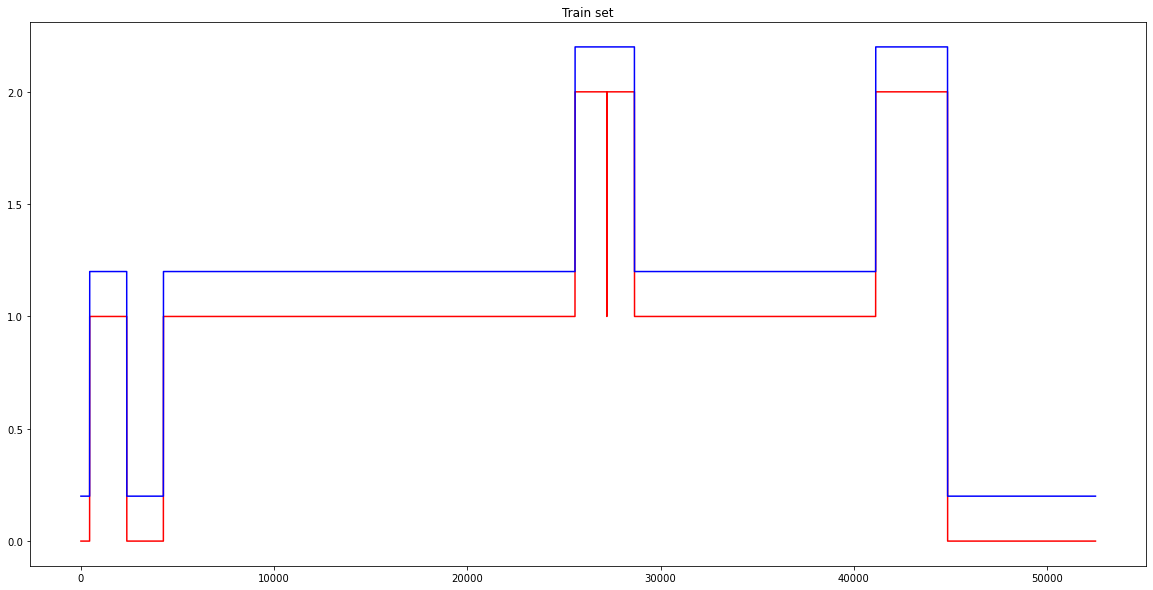

In [14]:
#do for entire training set

train_labels=np.argmax(all_gt_sampled_oh, axis=1)
clf = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(all_features, train_labels)

y_pred_train = clf.predict(all_features)
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_train, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Train set')
plt.show()

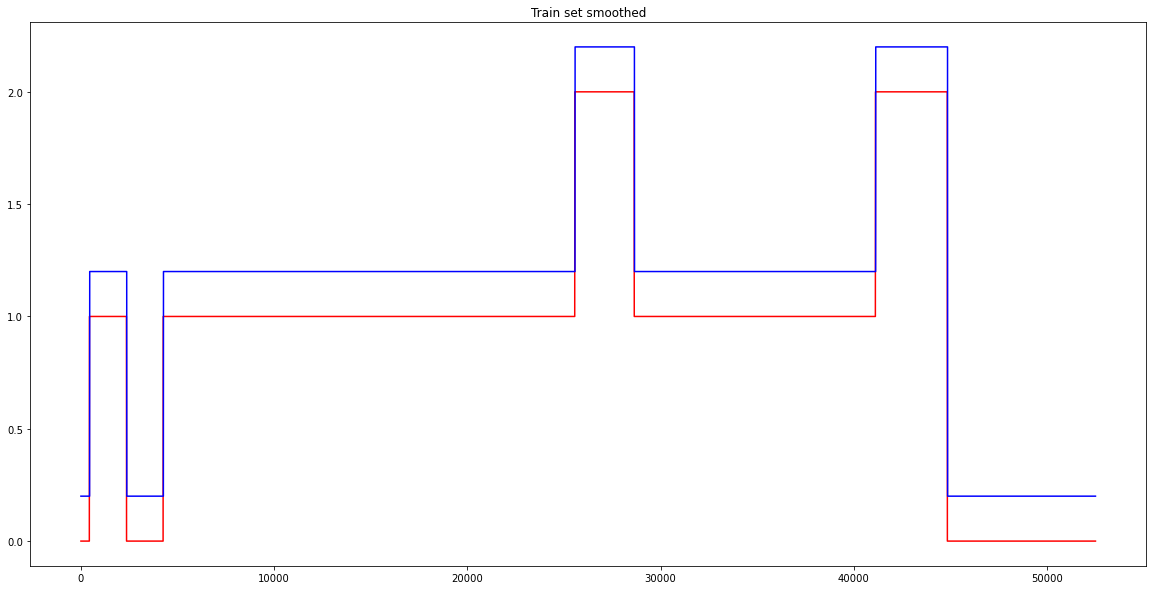

0.9981334044417356
[[ 9975    28     0]
 [   14 35662    28]
 [   14    14  6767]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00     35704
           2       1.00      1.00      1.00      6795

    accuracy                           1.00     52502
   macro avg       1.00      1.00      1.00     52502
weighted avg       1.00      1.00      1.00     52502



In [15]:
#Smoothing
from statistics import mode

y_pred_train_smooth=np.zeros(y_pred_train.shape)
for i in range(0,y_pred_train.shape[0]-30):
    y_pred_train_smooth[i:i+30]=mode(y_pred_train[i:i+30])
y_pred_train_smooth[-30:]=mode(y_pred_train[-30:])


plt.figure(figsize=(20,10))
plt.plot(y_pred_train_smooth, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Train set smoothed')

plt.show()

print(accuracy_score(train_labels, y_pred_train_smooth))
print(confusion_matrix(train_labels, y_pred_train_smooth))
print(classification_report(train_labels, y_pred_train_smooth))

0.9999619062130967
[[10002     1     0]
 [    0 35704     0]
 [    0     1  6794]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00     35704
           2       1.00      1.00      1.00      6795

    accuracy                           1.00     52502
   macro avg       1.00      1.00      1.00     52502
weighted avg       1.00      1.00      1.00     52502



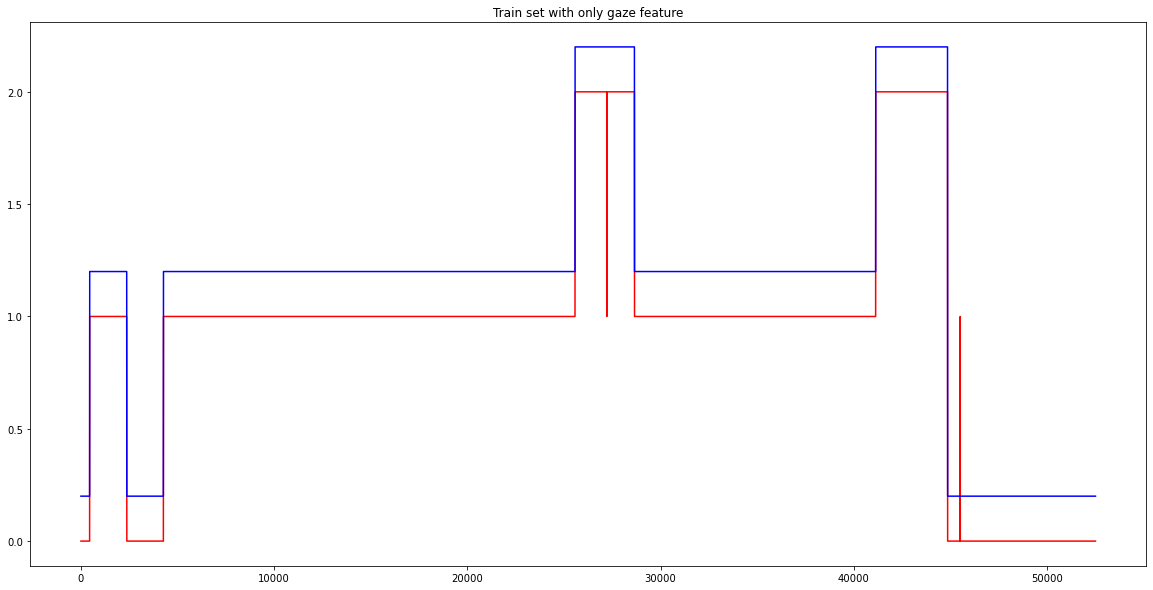

In [16]:
#Ablation study

#Take only gaze as feature
train_labels=np.argmax(all_gt_sampled_oh, axis=1)
clf_gaze = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(all_features[:,0:3], train_labels)

y_pred_train = clf_gaze.predict(all_features[:,0:3])
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_train, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Train set with only gaze feature')
plt.show()


0.9999619062130967
[[10002     1     0]
 [    0 35704     0]
 [    0     1  6794]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10003
           1       1.00      1.00      1.00     35704
           2       1.00      1.00      1.00      6795

    accuracy                           1.00     52502
   macro avg       1.00      1.00      1.00     52502
weighted avg       1.00      1.00      1.00     52502



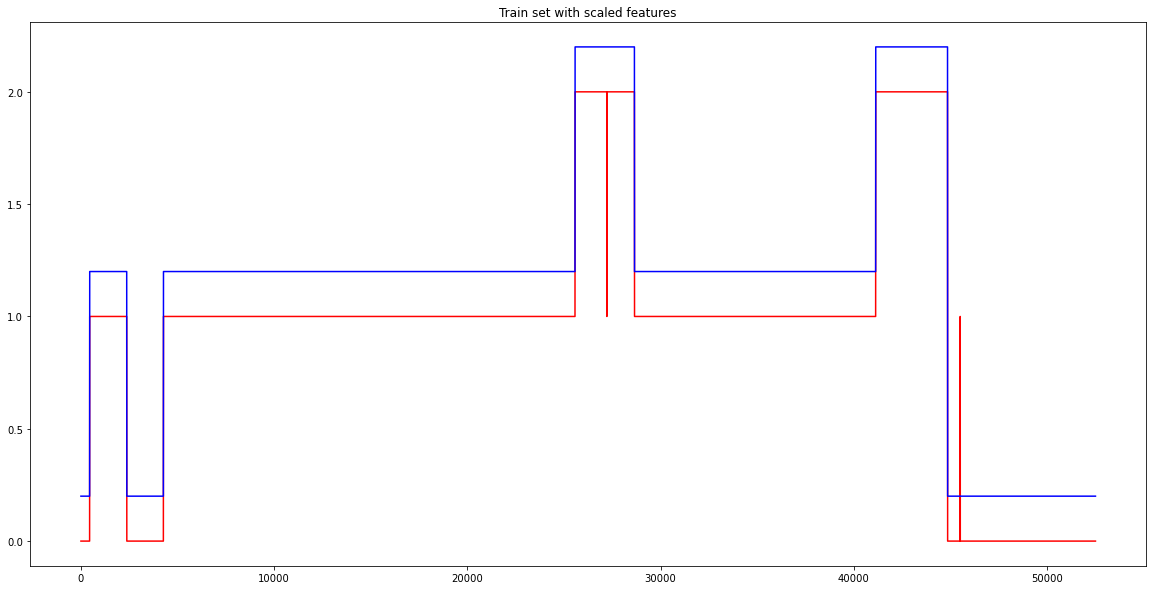

In [17]:
#Ablaion study
#Scaling of features
all_features_scaled=all_features.copy()
all_features_scaled[:,3]=all_features_scaled[:,3]/(all_features_scaled[:,3]+all_features_scaled[:,4]+0.00001)
all_features_scaled[:,4]=all_features_scaled[:,4]/(all_features_scaled[:,3]+all_features_scaled[:,4]+0.00001)


train_labels=np.argmax(all_gt_sampled_oh, axis=1)
clf_scaled = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(all_features_scaled, train_labels)

y_pred_train = clf_scaled.predict(all_features_scaled)
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_train, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Train set with scaled features')
plt.show()

In [18]:
#Trying to test on different video

all_gt=np.array([]).reshape(0,2)

frame_max=0

for i in range(1,2):
    gt=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\GT data\Jan 19_per_frame\ video_gtpf_'+str(i)+'.npy')
    print(gt[-1,0])
    frame_max=max(frame_max,gt[-1,0])
    if i>1:
        gt[:,0]=gt[:,0]+frame_max
    frame_max=gt[-1,0]
    print("   Frame Max frame for video= ",str(i)," = ",frame_max)
    print("Max frame for video= ",str(i)," = ",np.max(gt[:,0]))
    all_gt=np.concatenate((all_gt,gt),axis=0)
    print("  and last frame = ",all_gt[-1,0])
print(all_gt.shape)
print("   Frame Max frame for all video = ",frame_max)
print("Max frame for all video = ",np.max(all_gt[:,0]))
    
a=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\output_data_processed\Jan 19_2\video_1.npy')
#print(a.shape)
#print(a[1000,:])
#print(np.max(a[:,0]))

#load all video data
frame_max=0
all_data=np.array([]).reshape(-1,a.shape[1])
for i in range(1,2):
    a=np.load(r'D:\Kinect Tools\Nahian\Code Backup Mar 29\All_code_f\Neo_offline_track\output_data_processed\Jan 19_2\video_'+str(i)+'.npy')
    print(a.shape)
    frame_max=max(frame_max,np.max(a[:,0]))
    if i>1:
        a[:,0]=a[:,0]+frame_max
    frame_max=np.max(a[:,0])
    print("   Frame Max frame for video= ",str(i)," = ",frame_max)
    print("Max frame for video= ",str(i)," = ",np.max(a[:,0]))
    all_data=np.vstack((all_data,a))
    print(" and Last frame= ",all_data[-1,0])
print(all_data.shape)

print(all_data[-1,0])

20992.0
   Frame Max frame for video=  1  =  20992.0
Max frame for video=  1  =  20992.0
  and last frame =  20992.0
(20992, 2)
   Frame Max frame for all video =  20992.0
Max frame for all video =  20992.0
(76099, 17)
   Frame Max frame for video=  1  =  20992.0
Max frame for video=  1  =  20992.0
 and Last frame=  20992.0
(76099, 17)
20992.0


In [19]:
#sample the data where activity class is 6

#Delete 6
b=np.where(all_gt[:,1]==6)[0]
print("Having 6: ",b.shape)
frames_to_delete=all_gt[b,0]
print(frames_to_delete.shape)
all_gt_sampled=np.delete(all_gt,b,0)
print(all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==6)[0]
print(b_ver.shape)



#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data,b,0)


#Delete 5
b=np.where(all_gt_sampled[:,1]==5)[0]
print("Having 5: ",b.shape)
frames_to_delete=all_gt_sampled[b,0]
all_gt_sampled=np.delete(all_gt_sampled,b,0)
print("All gt sampled= ",all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==5)[0]
print(b_ver.shape)

print(frames_to_delete.shape)

#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data_sampled[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data_sampled,b,0)


#Delete 4
b=np.where(all_gt_sampled[:,1]==4)[0]
print("Having 4: ",b.shape)
print("All gt sampled= ",all_gt_sampled.shape)
frames_to_delete=all_gt_sampled[b,0]
all_gt_sampled=np.delete(all_gt_sampled,b,0)
print("All gt sampled= ",all_gt_sampled.shape)
b_ver=np.where(all_gt_sampled[:,1]==4)[0]
print(b_ver.shape)

print(frames_to_delete.shape)

#delete the frames from all_data
b=[indices for indices, x in enumerate(all_data_sampled[:,0]) if x in frames_to_delete]
print(len(b))
all_data_sampled=np.delete(all_data_sampled,b,0)



unique_frames=np.unique(all_data_sampled[:,0])
print(unique_frames.shape)
print(all_gt_sampled.shape)


#One hot encoding

all_gt_sampled_oh=np.zeros((all_gt_sampled.shape[0],4))

for i in range(all_gt_sampled.shape[0]):
    all_gt_sampled_oh[i,int(all_gt_sampled[i,1])-1]=1





Having 6:  (0,)
(0,)
(20992, 2)
(0,)
0
Having 5:  (0,)
All gt sampled=  (20992, 2)
(0,)
(0,)
0
Having 4:  (1590,)
All gt sampled=  (20992, 2)
All gt sampled=  (19402, 2)
(0,)
(1590,)
2106
(19402,)
(19402, 2)


In [20]:

#Feature extraction

all_features=np.zeros((all_gt_sampled_oh.shape[0],6))

i=0
for frames in tqdm(unique_frames):
    b=np.where(all_data_sampled[:,0]==frames)[0]
    current_frame=all_data_sampled[b,:]
    poses=(current_frame[:,3]>1300).astype(int).reshape(current_frame.shape[0],1) 
    all_features[i,3]=sum(poses)#standing
    all_features[i,4]=current_frame.shape[0]-sum(poses)#sitting

    if sum(poses)>0 and sum(poses)<current_frame.shape[0]: #Some standing, some sitting
        y_values=np.zeros((current_frame.shape[0],1))
        x_values=np.zeros((current_frame.shape[0],1))
        z_values=np.zeros((current_frame.shape[0],1))
        flag_presentation=0
        
        
        if sum(poses)<=0.5*current_frame.shape[0]: #Most people sitting
            for j in range(current_frame.shape[0]):
                y_values[j]=current_frame[j,2]
                x_values[j]=current_frame[j,1]
                z_values[j]=current_frame[j,3]
            
            alu_gaze=[]

            for j in range(current_frame.shape[0]):
                if (y_values[j]>9600 and x_values[j]>1850 and x_values[j]<4200 and z_values[j]>1300) or (y_values[j]>9200 and x_values[j]>2400 and x_values[j]<4200 and z_values[j]>1300) : # Presenter is standing, most people sitting
                    flag_presentation=1
                    all_features[i,5]=1
                    other_ids=np.delete(np.arange(current_frame.shape[0]),j)
                    #sampled_current_frame=current_frame[other_ids,:]
                    sampled_current_frame=current_frame.copy()
                    sampled_points=sampled_current_frame[:,11:14]/(np.linalg.norm(sampled_current_frame[:,11:14])+0.00001)
                    sampled_heads=sampled_current_frame[:,1:4]

                    #x0 = np.array([1,1,1])
                    #result = least_squares(objective, x0, args=tuple(sampled_points))
                    #gaze_point=result.x/np.linalg.norm(result.x)
                    gaze_point=close_point(sampled_heads,sampled_points)

                    all_features[i,0:3]=gaze_point
                    break
    else:
        all_features[i,5]=0
        sampled_points=current_frame[:,11:14]/(np.linalg.norm(current_frame[:,11:14])+0.00001)
        sampled_heads=current_frame[:,1:4]
        
        #x0 = np.array([1,1,1])
        #result = least_squares(objective, x0, args=tuple(sampled_points))
        #gaze_point=result.x/np.linalg.norm(result.x)
        gaze_point=close_point(sampled_heads,sampled_points)
        all_features[i,0:3]=gaze_point
    i=i+1



    #print(all_data_sampled[b,1:])

100%|██████████| 19402/19402 [00:04<00:00, 4507.38it/s]


0.687661065869498
[[    0  3780     0]
 [    0 13342     0]
 [    0  2280     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3780
           1       0.69      1.00      0.81     13342
           2       0.00      0.00      0.00      2280

    accuracy                           0.69     19402
   macro avg       0.23      0.33      0.27     19402
weighted avg       0.47      0.69      0.56     19402



c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

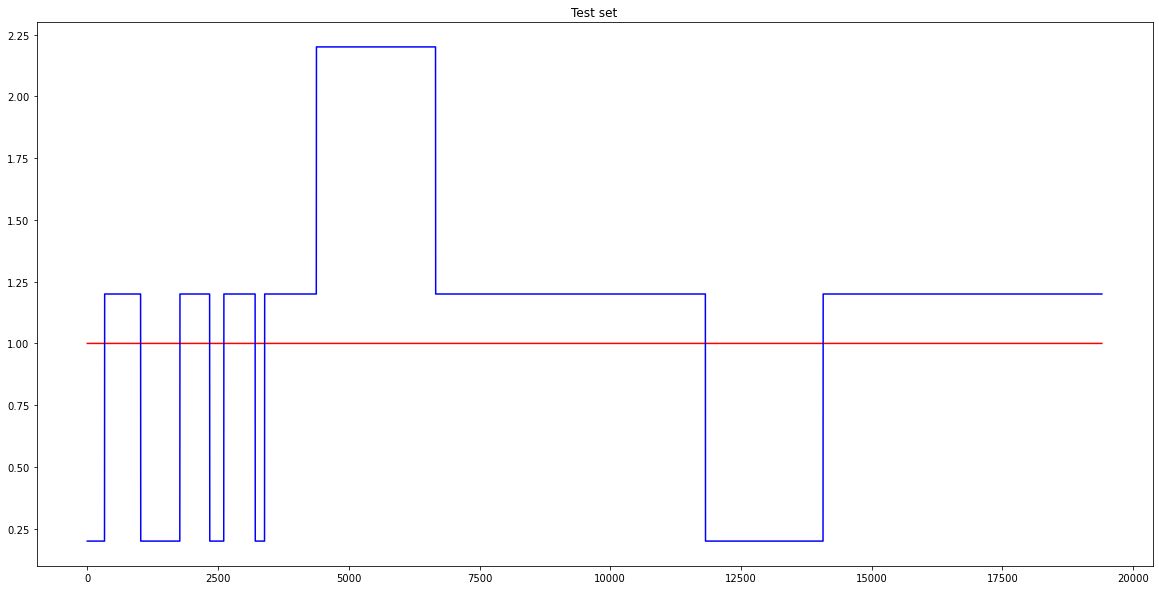

In [21]:
#do for entire Test set

train_labels=np.argmax(all_gt_sampled_oh, axis=1)
#clf = svm.SVC(kernel='rbf', C=1, gamma=0.1).fit(all_features, train_labels)

y_pred_train = clf.predict(all_features)
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_train, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Test set')
plt.show()

In [22]:
import pickle
import os
savepath=os.getcwd()
savepath=os.path.join(savepath,'Trained models')
filename = os.path.join(savepath,'svm_feb2.sav')


pickle.dump(clf, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
clf_load= pickle.load(open(filename, 'rb'))
y_pred_train = clf_load.predict(all_features)
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

0.687661065869498
[[    0  3780     0]
 [    0 13342     0]
 [    0  2280     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3780
           1       0.69      1.00      0.81     13342
           2       0.00      0.00      0.00      2280

    accuracy                           0.69     19402
   macro avg       0.23      0.33      0.27     19402
weighted avg       0.47      0.69      0.56     19402



c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

0.687661065869498
[[    0  3780     0]
 [    0 13342     0]
 [    0  2280     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3780
           1       0.69      1.00      0.81     13342
           2       0.00      0.00      0.00      2280

    accuracy                           0.69     19402
   macro avg       0.23      0.33      0.27     19402
weighted avg       0.47      0.69      0.56     19402



c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Nahian\anaconda3\envs\pyKinectAzure\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

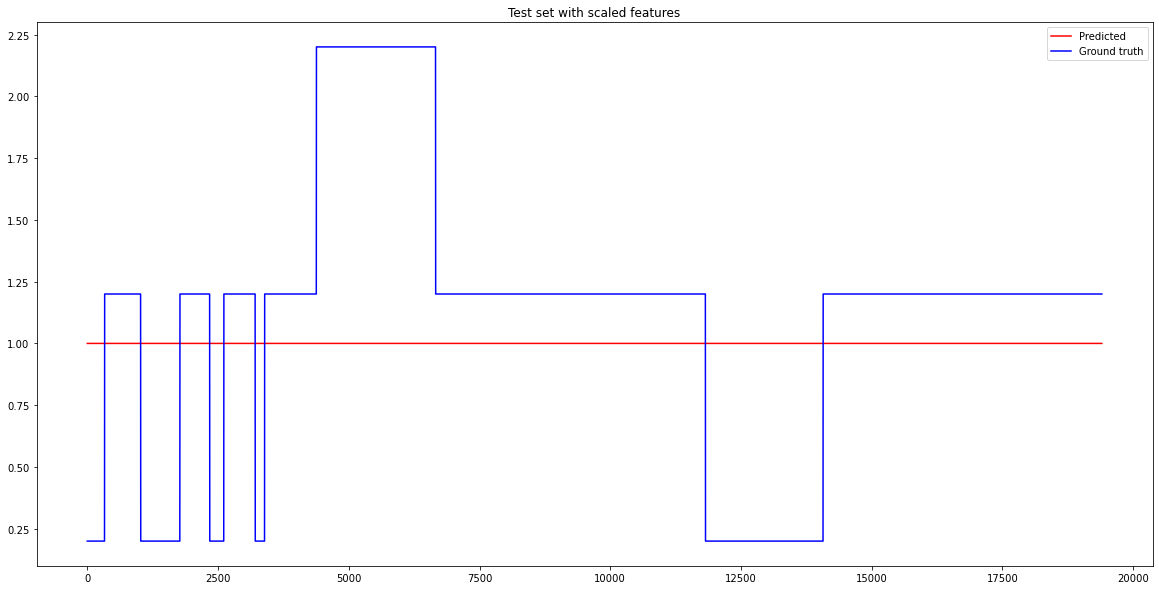

In [23]:
#With scaled features

y_pred_train = clf_scaled.predict(all_features)
print(accuracy_score(train_labels, y_pred_train))
print(confusion_matrix(train_labels, y_pred_train))
print(classification_report(train_labels, y_pred_train))

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_train, 'r')
plt.plot(train_labels+0.2, 'b')
plt.title('Test set with scaled features')
plt.legend(['Predicted','Ground truth'])
plt.show()